# "Hello, World!" - OqtAPI 
This notebook runs on Oqtant hardware and uses **2 jobs** 

Welcome to the `Oqtant Python API`, aka `OqtAPI`! OqtAPI is an object-oriented interface for creating, submitting, and retrieving results from experiments with ultracold quantum matter on Infleqtion's Oqtant Quantum Matter Services (QMS) platform.  In this example notebook, we will use Oqtant to make real quantum matter: a Bose-Einstein condensate (BEC) of rubidium-87 atoms. We will manipulate the quantum matter with a (user designed) optical potential and observe the result. 

OqtAPI includes in-depth, walkthrough-style jupyter notebooks to introduce the powerful capabilities of OqtAPI and Oqtant.  

For more install instructions, please refer to our [Quick Start Guide.](https://oqtant-docs.infleqtion.com/INSTALL/) 

See our web application https://oqtant.infleqtion.com/ for quick access to job creation, results, and account management.  

Visit our support page for FAQs, contact information, and to share feedback and report bugs: https://oqtant.infleqtion.com/support

All our example notebooks are publicly available on our [GitLab repository.](https://gitlab.com/infleqtion/albert/oqtant-documentation/-/tree/main/oqtant_documentation/docs/examples?ref_type=heads)

This example notebook is a small sample of OqtAPI and Oqtant capabilities.  Walkthroughs will explore how to use OqtAPI, user options, accessible abstractions, and data structures in more detail.

## Imports and (manual) user authentication ##

In [1]:
from oqtant.schemas.quantum_matter import QuantumMatterFactory
qmf = QuantumMatterFactory()

Binder does not support Oqtant's automatic user authentication methods / widgets, so we authenticate manually:  

1. Copy your access token from [oqtant.infleqtion.com/oqtantAPI](https://oqtant.infleqtion.com/oqtantAPI)
2. Paste that token just below and execute the cell (the if statement keeps the code from executing if you already authenticated above)

In [ ]:
qmf.login.access_token = "Paste your token here between the quotes!"
qmf.get_client()

## Make Quantum Matter  ##

The first type of job we will run is a BEC Generator, which allows users to experiment with the quantity of atoms that arrive in the quantum state (the BEC) as the ensemble is cooled. 

### 1. Create a QuantumMatter object ###

In [5]:
matter = qmf.create_quantum_matter(temperature=100, name="Hello, quantum world!")

### 2. Submit it to Oqtant QMS ###

In [ ]:
matter.submit(track=True)

Submitting 1 job(s):

- Job: Hello, quantum world!
  Job ID: 2ecc02e9-8afb-413f-93f2-d4bcc0e4bcb0

Tracking 1 job(s):


### 3. Fetch the results ###

In [6]:
matter.get_result()
matter.status

'COMPLETE'

### 4. View and/or analyze the results (in this case, "just" view the quantum wavefunction) ###

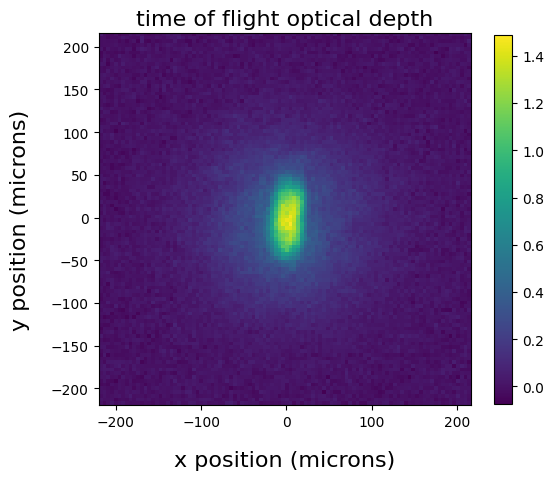

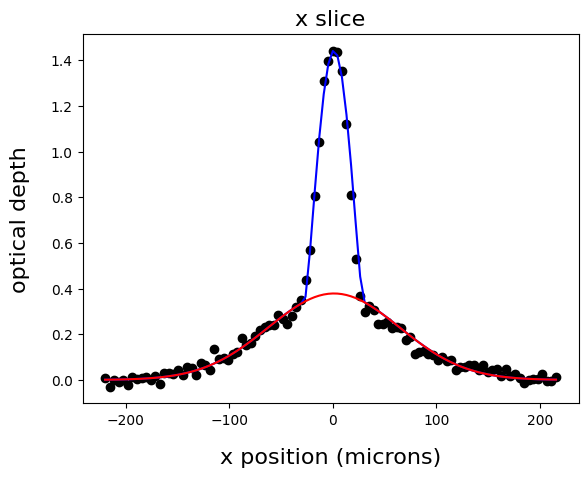

In [7]:
matter.output.plot_tof(figsize=(6, 6))
matter.output.plot_slice(axis="x")

## Manipulate with "painted" light ##

OqtAPI also allows users to manipulate the BEC using repulsive optical potential barriers. Barrier manipulation occurs after the cooling process is complete. Barrier manipulation is the starting point for atomtronics, sensors, and more!

### 1. Create a dynamic "Barrier" ###

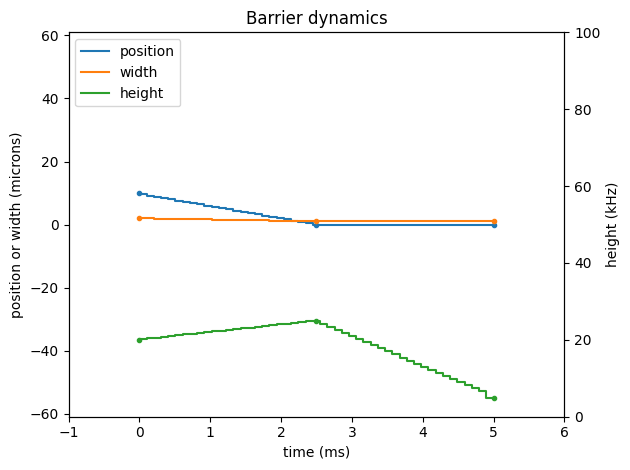

In [8]:
barrier = qmf.create_barrier(
    positions=[10, 0],
    heights=[20, 25],
    widths=[2, 1],
    times=[0, 2.5],
    shape="GAUSSIAN",
)

# add dynamics with a scripting style
barrier.evolve(duration=2.5, height=5)

barrier.show_dynamics()

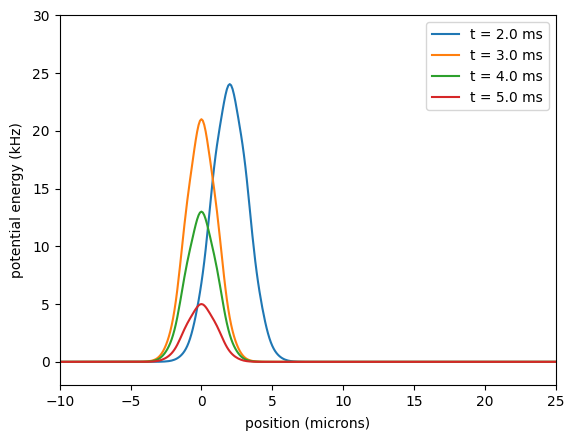

In [9]:
barrier.show_potential(times=[2.0, 3.0, 4.0, 5.0], xlimits=[-10, 25], ylimits=[-2, 30])

### 2. Make and manipulate QuantumMatter ###

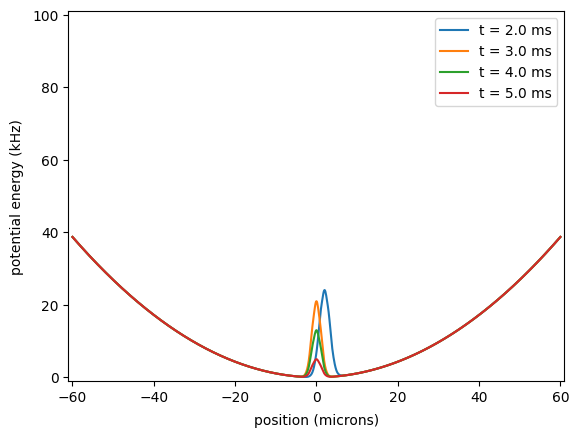

In [10]:
import numpy as np

matter = qmf.create_quantum_matter(
    temperature=100,
    image="IN_TRAP",  # option to view atom ensemble while in trap
    barriers=[barrier],
    lifetime=8,
    name="Now with barriers!",
)

matter.show_potential(times=[2.0, 3.0, 4.0, 5.0])

### 3. Submit it to Oqtant QMS ###

In [11]:
matter.submit(track=True)

Submitting 1 job(s):

- Job: Now with barriers!
  Job ID: ac4243a6-ac3f-4129-90e7-f3e0c8ec56ed

Tracking 1 job(s):

- Job: Now with barriers!
  - RUNNING
  - COMPLETE

All job(s) complete


### 4. Fetch the results ###

In [12]:
matter.get_result()
matter.status

'COMPLETE'

### 5. View and/or analyze results ###

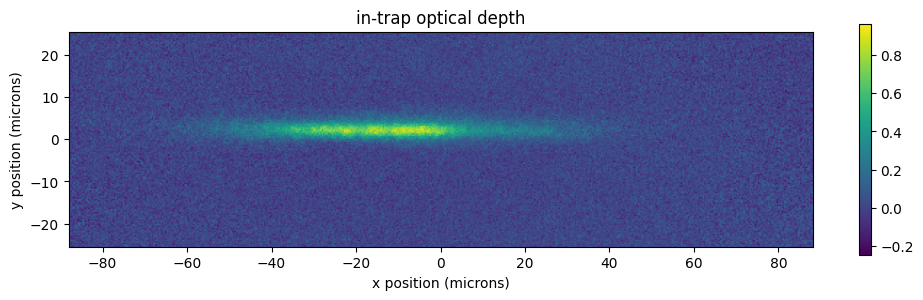

In [13]:
matter.output.plot_it()